In [1]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from utils_plots import *
from qiskit.providers.ibmq.managed import IBMQJobManager

In [2]:
IBMQ.load_account()
provider    = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')
backend     = provider.get_backend('ibm_perth')
job_manager = IBMQJobManager() 

In [3]:
jobs = '00d3107d150c4856bb145bc3fca2f147-16647947252239227'

In [4]:
result_set = job_manager.retrieve_job_set(jobs, provider).results()
results    = result_set.combine_results()
save_results( results, jobs )

In [5]:
dpmt = device_process_measurement_tomography( backend )
circuits_dpmt = dpmt.circuits()

In [6]:
results_tomography = dpmt.fit( results, paralell=True, gate_set=True )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset     
np.save( 'data_tomo'+jobs, np.array(results_tomography, dtype=object) )                         

In [25]:
results_tomography = np.load( 'data_tomo'+jobs+'.npy', allow_pickle=True ).all()
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset   

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


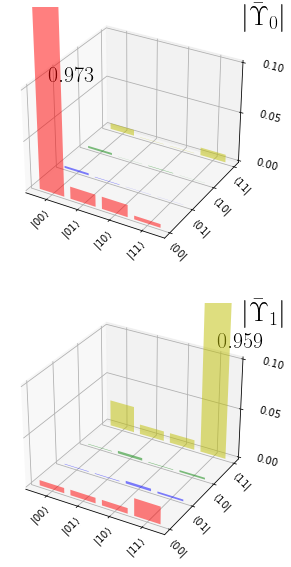

In [8]:
choi_single=results_single.chois
povm_single=results_single.povms
choi_single_mean = np.mean(choi_single, axis=0)

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\bar\Upsilon_0|$', r'$|\bar\Upsilon_1|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mean , shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_mean_single.png', bbox_inches='tight' )
plt.savefig('choi_mean_single.svg', bbox_inches='tight' )

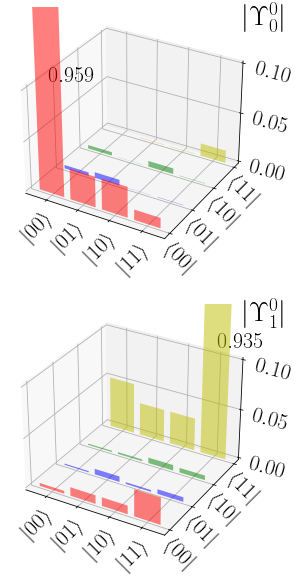

In [9]:

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^0|$', r'$|\Upsilon_1^0|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single[0], shape=(2,1)  )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_worst.png', bbox_inches='tight' )
plt.savefig('choi_single_worst.svg', bbox_inches='tight' )

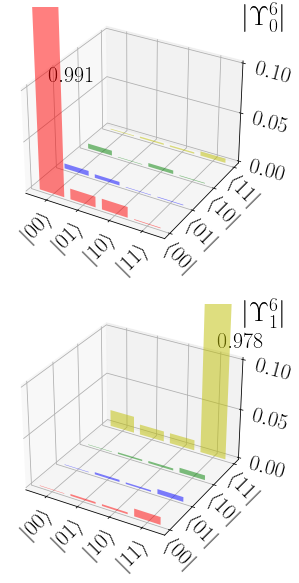

In [10]:

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^6|$', r'$|\Upsilon_1^6|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single[6], shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_best.png', bbox_inches='tight' )
plt.savefig('choi_single_best.svg', bbox_inches='tight' )

[<Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>]

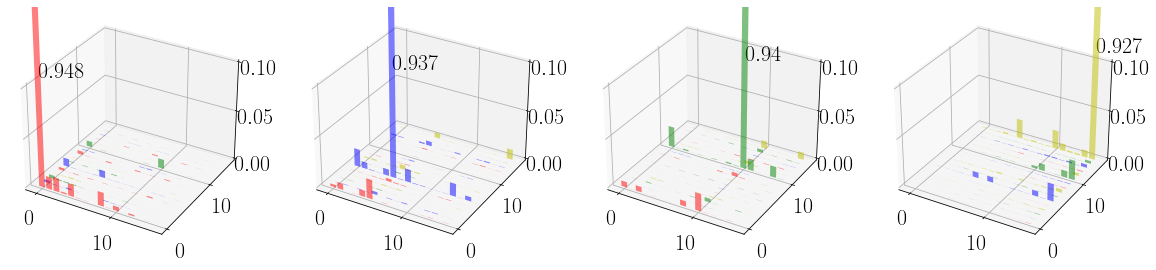

In [11]:
choi_double = [ results_double[j].chois for j in range(3)]
povm_double = [ results_double[j].povms for j in range(3)]
choi_double_mean = np.mean( choi_double, axis=(0,1) )
Plot_Chois( choi_double_mean )

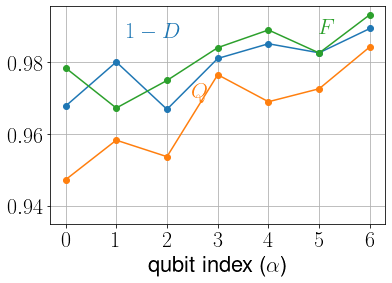

In [12]:
from turtle import color


quantities_single = []
for j in range(7):
    quantities_single.append( Quantities( povm_single[j], choi_single[j] ) )

plt.plot( np.array(quantities_single)[:,[2,1,0]], '-o', label=['$F$','$Q$','$nD$'] )
plt.grid()
plt.xlabel('qubit index ($\\alpha$)')
plt.xticks([0,1,2,3,4,5,6])
plt.ylim( bottom=0.935)
plt.text( 5, 0.988, '$F$', color='tab:green' )
plt.text( 2.5, 0.97, '$Q$', color='tab:orange' )
plt.text( 1.2, 0.987, '$1-D$', color='tab:blue' )
plt.savefig('quantities_single.svg', bbox_inches='tight' )
plt.savefig('quantities_single.png', bbox_inches='tight' )

In [13]:
import seaborn as sns
import matplotlib

def create_color_map( error_mean, vmin=0, vmax=100, **args):
    color_map = sns.cubehelix_palette( reverse=True, as_cmap=True, **args)
    colors = matplotlib.colors.Normalize( vmin=vmin, vmax=vmax )
    l_colors = [255*np.array(color_map(colors(100*err))) for err in error_mean ]
    return 255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

In [14]:
create_color_map(np.mean( quantities_single, 1 ), 96, 99, start=2.8, rot=.1 )

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([ 53.38087105,  64.01928662, 101.94882509, 255.        ]),
  array([ 76.39660495,  85.59298838, 132.55610384, 255.        ]),
  array([ 56.28536229,  66.85001673, 106.11721156, 255.        ]),
  array([155.41048708, 153.56598471, 207.02679999, 255.        ]),
  array([159.9044047 , 157.47237041, 210.18186491, 255.        ]),
  array([147.53767226, 146.78076375, 201.25520602, 255.        ]),
  array([211.46519963, 205.43395169, 239.58570313, 255.        ])])

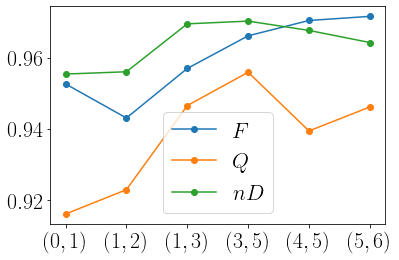

In [15]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]
quantities_double = []
for j in range(3):
    for k in range(2):
        quantities_double.append( Quantities( povm_double[j][k], choi_double[j][k] ) )
plt.plot( np.array(quantities_double)[order_pairs], '-o', label=['$F$','$Q$','$nD$'] )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.legend()

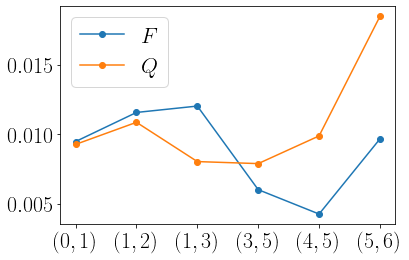

In [16]:
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]
correlations = []
for j in range(3):
    for k in range(2):
        q0, q1 = pairs[j][k]   
        correlations.append( Cross_Quantities( povm_single[q0], choi_single[q0],
                                                povm_single[q1], choi_single[q1],
                                                povm_double[j][k], choi_double[j][k] ) )

plt.plot( np.array(correlations)[order_pairs], '-o', label=['$F$','$Q$'] )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.legend()